# Imports

## Libraries

In [426]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
import seaborn as sns

pd.set_option('display.max_colwidth', None)
pd.options.display.float_format = '{:.4f}'.format

sns.set_style('whitegrid', {'grid.linewidth': .05, 'grid.color': '.85'})

## Data

![Database Schema](assets/database_schema.png)


We have a relational database with 8 tables:
- olist_orders_dataset
- olist_order_customer_dataset
- olist_order_payments_dataset
- olist_order_reviews_dataset
- olist_order_items_dataset
- olist_products_dataset
- olist_sellers_dataset
- olist_geolocation_dataset


**olist_orders_dataset**

In [166]:
df_orders_raw = pd.read_csv('data/source/olist_orders_dataset.csv')
df_orders_raw.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


**olist_order_items_dataset**

In [167]:
df_order_items = pd.read_csv('data/source/olist_order_items_dataset.csv')
df_order_items.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9000,13.2900
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9000,19.9300
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0000,17.8700
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.9900,12.7900
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.9000,18.1400


**olist_order_reviews_dataset**

In [168]:
df_order_reviews = pd.read_csv('data/source/olist_order_reviews_dataset.csv')
df_order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela Internet seguro e prático Parabéns a todos feliz Páscoa,2018-03-01 00:00:00,2018-03-02 10:26:53


**olist_order_customer_dataset**

In [169]:
df_customers = pd.read_csv('data/source/olist_customers_dataset.csv')
df_customers.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


**olist_order_payments_dataset**

In [170]:
df_payments = pd.read_csv('data/source/olist_order_payments_dataset.csv')
df_payments

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.3300
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.3900
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.7100
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.7800
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.4500
...,...,...,...,...,...
103881,0406037ad97740d563a178ecc7a2075c,1,boleto,1,363.3100
103882,7b905861d7c825891d6347454ea7863f,1,credit_card,2,96.8000
103883,32609bbb3dd69b3c066a6860554a77bf,1,credit_card,1,47.7700
103884,b8b61059626efa996a60be9bb9320e10,1,credit_card,5,369.5400


**olist_sellers_dataset**

In [171]:
df_sellers = pd.read_csv('data/source/olist_sellers_dataset.csv')
df_sellers.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**olist_products_dataset**

In [172]:
df_products = pd.read_csv('data/source/olist_products_dataset.csv')
df_products.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0000,287.0000,1.0000,225.0000,16.0000,10.0000,14.0000
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0000,276.0000,1.0000,1000.0000,30.0000,18.0000,20.0000
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0000,250.0000,1.0000,154.0000,18.0000,9.0000,15.0000
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0000,261.0000,1.0000,371.0000,26.0000,4.0000,26.0000
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0000,402.0000,4.0000,625.0000,20.0000,17.0000,13.0000


In [173]:
df_products_translations = pd.read_csv(
    'data/source/product_category_name_translation.csv')
df_products_translations

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


# Datasets overview

The goal of this part is to discover and understand the variables of each dataset, detect missing values and outliers, understand which datasets will bring the most value for the analysis and client segmentation.

## Orders

In [174]:
df_orders = df_orders_raw.copy()

In [175]:
df_orders.sample(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
40364,c012d344cb9c8788cdbf60b4e4d1fc43,37443de33b5b20b5fa0f6409e3e40708,delivered,2018-03-20 17:08:17,2018-03-22 10:35:33,2018-03-22 22:11:53,2018-04-25 15:40:43,2018-04-17 00:00:00
1747,cc0482c9c30742e1f8ce96e0e1cebe07,58993c1b0cf20b93cd56ce5ca278381e,delivered,2018-07-20 17:07:51,2018-07-21 17:04:01,2018-07-23 07:53:00,2018-07-25 19:46:49,2018-07-30 00:00:00
38401,5bbe99cfacba17ac9fbfd3b9c873f41e,edf0da35d967d6dd4846962987b7fa00,delivered,2018-04-30 10:24:43,2018-04-30 12:15:50,2018-05-03 20:19:00,2018-05-10 01:11:11,2018-05-17 00:00:00
59298,5f498836a73a6ef414a303556f3f83bb,a5c29c5041ae005b9b27fe575835ef3b,delivered,2018-04-25 21:28:23,2018-04-25 21:51:16,2018-04-27 16:00:00,2018-05-07 22:36:48,2018-05-22 00:00:00
69844,c3484520f8dc5726ffb461d9b63e162f,65408e1b890ef91ebd20525415a75006,delivered,2018-03-01 14:31:54,2018-03-01 15:10:44,2018-03-02 18:23:33,2018-03-05 16:42:53,2018-03-13 00:00:00
92041,4ccfa0c7ce3c1a6069ae72d9596c4d6e,433213c150052114940ca5cea0eae794,delivered,2018-07-21 16:21:16,2018-07-21 16:35:12,2018-07-23 14:58:00,2018-07-30 15:58:33,2018-08-09 00:00:00
72297,8019e5f3a23ce0342b60a67f3fda2c65,7e0b99de3ad5bd9bea61fea9629aff5d,delivered,2017-12-01 15:22:27,2017-12-05 04:15:40,2017-12-05 20:27:45,2017-12-18 21:22:02,2017-12-27 00:00:00
46778,463cefaa4147d39621500e986396b5cf,2d9765abf313219e40efb7770ea42025,delivered,2017-12-08 17:31:28,2017-12-08 17:53:37,2017-12-11 20:47:02,2017-12-28 16:32:49,2018-01-15 00:00:00
81308,60bf6f1b8154d2d1d694f83b42a29c15,61a5bdcc5d682ccad9e7e301c368ac84,delivered,2018-05-02 13:51:12,2018-05-02 17:54:00,2018-05-03 11:15:00,2018-05-29 16:18:43,2018-06-06 00:00:00
14733,a2dab3609509cbd5ea851ecd77d6097e,db226443fd1202670a8e85dead125d7f,delivered,2017-08-18 21:05:22,2017-08-18 21:44:16,2017-08-22 14:55:04,2017-09-02 15:49:53,2017-09-20 00:00:00


In [176]:
df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [272]:
df_orders.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [177]:
df_orders.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

The dataset contains 99441 items (each item = order), each order is linked to the customer_id, various order and delivery dates are also provided as well as the order status. We see missing values for the approved and delivery dates.

The dates columns are in string format, convert them to datetime for easier manipulation.

In [178]:
order_dates = [
    'order_purchase_timestamp', 'order_approved_at',
    'order_delivered_carrier_date', 'order_delivered_customer_date',
    'order_estimated_delivery_date'
]
df_orders[order_dates] = df_orders[order_dates].apply(pd.to_datetime)

df_orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB


In [276]:
min_date = df_orders['order_purchase_timestamp'].min()
max_date = df_orders['order_purchase_timestamp'].max()

print(f'orders from {min_date} to {max_date}')

orders from 2016-09-04 21:15:19 to 2018-10-17 17:30:18


Check different order statuses

In [179]:
counts = df_orders['order_status'].value_counts()
percs = df_orders['order_status'].value_counts(normalize=True)
pd.concat([counts, percs], axis=1, keys=['count', 'percentage'])

,count,percentage
delivered,96478,0.9702
shipped,1107,0.0111
canceled,625,0.0063
unavailable,609,0.0061
invoiced,314,0.0032
processing,301,0.0030
created,5,0.0001
approved,2,0.0000


<Axes: xlabel='count', ylabel='order_status'>

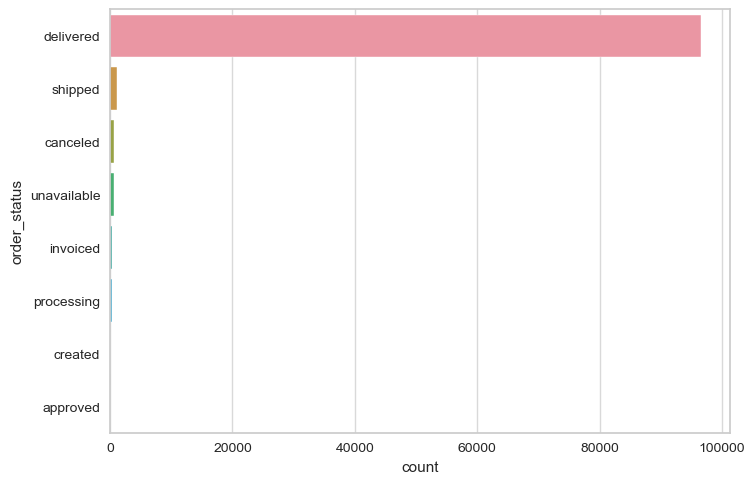

In [180]:
sns.countplot(y=df_orders['order_status'],
              order=df_orders['order_status'].value_counts().index)

97% of all orders have been delivered. We saw earlier that there are missing values for the delivery dates, let's check if it is related to the order status.

In [181]:
df_orders.loc[df_orders['order_approved_at'].isnull(), 'order_status'].unique()

array(['canceled', 'delivered', 'created'], dtype=object)

In [182]:
df_orders.loc[df_orders['order_delivered_customer_date'].isnull(),
              'order_status'].unique()

array(['invoiced', 'shipped', 'processing', 'unavailable', 'canceled',
       'delivered', 'created', 'approved'], dtype=object)

In [183]:
df_orders.loc[df_orders['order_delivered_carrier_date'].isnull(),
              'order_status'].unique()

array(['invoiced', 'processing', 'unavailable', 'canceled', 'created',
       'approved', 'delivered'], dtype=object)

We can suggest that at the moment when the dataset was extracted, there were still ongoing orders that have not been delivered yet (in status `processing`, `created`, `approved`, `invoiced`). The `canceled` status goes for orders that have been canceled so its logical that the delivery date in unknown. As for the `unavailable` status, it is not clear what it stands for. Orders without any delivery date and in `delivered` status are the most tricky to understand.

In [184]:
df_orders.loc[(df_orders['order_delivered_customer_date'].isnull()) &
              (df_orders['order_status'] == 'delivered'), :]

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaT,2017-12-18
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaT,2018-07-16
43834,2ebdfc4f15f23b91474edf87475f108e,29f0540231702fda0cfdee0a310f11aa,delivered,2018-07-01 17:05:11,2018-07-01 17:15:12,2018-07-03 13:57:00,NaT,2018-07-30
79263,e69f75a717d64fc5ecdfae42b2e8e086,cfda40ca8dd0a5d486a9635b611b398a,delivered,2018-07-01 22:05:55,2018-07-01 22:15:14,2018-07-03 13:57:00,NaT,2018-07-30
82868,0d3268bad9b086af767785e3f0fc0133,4f1d63d35fb7c8999853b2699f5c7649,delivered,2018-07-01 21:14:02,2018-07-01 21:29:54,2018-07-03 09:28:00,NaT,2018-07-24
92643,2d858f451373b04fb5c984a1cc2defaf,e08caf668d499a6d643dafd7c5cc498a,delivered,2017-05-25 23:22:43,2017-05-25 23:30:16,NaT,NaT,2017-06-23
97647,ab7c89dc1bf4a1ead9d6ec1ec8968a84,dd1b84a7286eb4524d52af4256c0ba24,delivered,2018-06-08 12:09:39,2018-06-08 12:36:39,2018-06-12 14:10:00,NaT,2018-06-26
98038,20edc82cf5400ce95e1afacc25798b31,28c37425f1127d887d7337f284080a0f,delivered,2018-06-27 16:09:12,2018-06-27 16:29:30,2018-07-03 19:26:00,NaT,2018-07-19


Let's check the most recent delivery dates to see if the delivery might still be ongoing.

In [185]:
df_orders.sort_values('order_delivered_customer_date', ascending=False).head(5)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
18731,7e708aed151d6a8601ce8f2eaa712bf4,033fab69968b0d69099d64423831a236,delivered,2018-06-02 18:37:14,2018-06-02 18:51:31,2018-06-04 13:42:00,2018-10-17 13:22:46,2018-07-13
56635,450cb96c63e1e5b49d34f223f67976d2,27ae7c8a8fc20ce80d96f01b6f19961b,delivered,2018-05-21 06:48:46,2018-05-21 06:57:03,2018-06-01 13:14:00,2018-10-11 16:41:14,2018-06-27
92319,b2997e1d7061605e9285496c581d1fbd,9e83d47684eb1a58b1c31830f5de10ac,delivered,2018-07-30 09:08:06,2018-07-30 09:44:33,2018-07-31 12:50:00,2018-10-02 00:18:50,2018-08-14
43810,a2b4be96b53022618030c17ed437604d,ffa87b4246c4848711afb512bd51f161,delivered,2018-07-22 09:54:03,2018-07-23 11:31:46,2018-07-23 14:48:00,2018-09-27 02:24:33,2018-08-17
21098,7d09831e67caa193da82cfea3bee7aa5,1409b2945191b7aff1975ba2ce9918c5,delivered,2018-08-05 17:11:44,2018-08-05 17:31:19,2018-08-07 14:44:00,2018-09-25 00:47:25,2018-08-20


The latest delivery date is '2018-10-17', the orders in `delivered` status without delivery date are more recent. We will assume for the moment that it might be due to the carrier services error that haven't filled in the delivery date. <br/>

Let's check the orders in `unavailable` status as they are the most difficult to interpret. Check if the orders contain any items or have reviews, have been payed, etc

In [186]:
unavailable_order_ids = df_orders.loc[df_orders['order_status']
                                      == 'unavailable', 'order_id']
unavailable_order_ids

266      8e24261a7e58791d10cb1bf9da94df5c
586      c272bcd21c287498b4883c7512019702
687      37553832a3a89c9b2db59701c357ca67
737      d57e15fb07fd180f06ab3926b39edcd2
1160     2f634e2cebf8c0283e7ef0989f77d217
                       ...               
99147    6cf5c427fb11bc5fe8abefa86aa7ba0b
99233    1c7c8ab324927f5b6e52338bd110bef4
99252    aaab15da689073f8f9aa978a390a69d1
99348    a69ba794cc7deb415c3e15a0a3877e69
99415    5fabc81b6322c8443648e1b21a6fef21
Name: order_id, Length: 609, dtype: object

In [187]:
df_order_reviews.loc[df_order_reviews['order_id'].isin(
    unavailable_order_ids), :]

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
305,6280ca6a9e8c3a56b668ec8c5396caaf,534a0fbe91a806a1dc6bf09b497e3d6f,1,NaN,Passou dos dias previstos.,2018-02-09 00:00:00,2018-02-14 04:13:49
510,81648dc10c6e3f763cdc0dbcd073d055,6e7e891760708803a2f4203981f2d69d,1,NaN,NaN,2017-03-19 00:00:00,2017-03-21 13:32:54
785,90018c08b2ca29dddcf499cfa5ec54d8,4b460251c3d2ba44dd61b0b6c3410ac6,3,NaN,"Boas Pessoal, a atendente da lannister foi muito atenciosa porém a loja que deveria ter me entregado o produto cancelou a comprar ??? O que será que aconteceu ???",2017-04-29 00:00:00,2017-04-29 07:07:24
1111,8f78ff92924bc0a30d0cd9b0b1adae64,d49363a0cc2a1915a5a11f85ea08ea48,1,NaN,NaN,2018-03-08 00:00:00,2018-03-12 11:51:57
1256,cab29f1f7496f39211eae61c4cf92a0e,309688f286ca9fb39735664ba1e37b29,2,NaN,NaN,2017-12-20 00:00:00,2017-12-20 07:48:37
...,...,...,...,...,...,...,...
98759,a3b11db7f71dae2127c6f406e2ab2a93,19bbda1f882b3aeddba973e935519905,1,NaN,NaN,2017-11-26 00:00:00,2017-11-26 03:43:26
98947,1fdbe363e853974e87d8f498d32065ea,d17cbd88da86748917f52864d1be98d0,1,NaN,"Pedi o estorno do valor, era pra ser entregue até dia 14/03 e nem enviado foi, não me ligaram pra da satisfação nada, péssima loja!",2018-03-17 00:00:00,2018-03-17 10:38:25
98953,1ddd65e557c027e7df4a50416417a2e4,fddbd183387b5c9bcbafbd0fe965301f,1,NaN,Só quero meu dinheiro de volta porque o pedido não chegou e não fizeram a devolução do dinheiro,2017-10-21 00:00:00,2017-10-21 13:54:44
99042,71fd2bd9edec8a1cd368a5fa173979d6,4a5cf649e3eb500fc079aace5f03583e,1,NaN,Não cumpriu o prazo.. Não teve capacidade para entregar o meu produto...,2018-03-30 00:00:00,2018-03-30 21:52:35


In [188]:
df_order_reviews.loc[df_order_reviews['order_id'].isin(
    unavailable_order_ids), 'order_id'].nunique()

595

We have 595 distinct order reviews out of 609 for the "unavailable" status orders.

In [189]:
df_payments.loc[df_payments['order_id'].isin(unavailable_order_ids), :]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
720,fe87d4b944748f63ca5ed22cc55b6fb6,1,debit_card,1,173.6800
1014,4a42846a6eed9d15714fe30181399f2a,1,credit_card,1,34.3700
1086,6ad57aecbae806a7e9cc2cdb6b380711,1,credit_card,2,161.4700
1267,98fe01bc254b759c1f2c11d77c2891d5,1,voucher,1,150.0000
1307,52267d8c7f4a0227294efd0ef23fcefb,1,credit_card,1,37.6800
...,...,...,...,...,...
103069,0010dedd556712d7bb69a19cb7bbd37a,1,boleto,1,111.1200
103566,b7fa03eeccba341d5ab0dc86bfb1b08c,1,credit_card,1,103.0500
103718,fc20b8e282da6f3fbcdd3a3cedecb723,1,credit_card,10,3782.1900
103728,92fca7ed7b7df4695007bd7f227e3333,1,credit_card,1,52.5700


In [190]:
df_payments.loc[df_payments['order_id'].isin(
    unavailable_order_ids), 'order_id'].nunique()

609

All the orders have been payed for.

In [191]:
df_order_items.loc[df_order_items['order_id'].isin(unavailable_order_ids), :]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
11558,1a47da1d66c70489c8e35fe2b5433ab7,1,eba7488e1c67729f045ab43fac426f2e,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 18:53:48,249.9000,20.8500
20902,2fd1c83dd4714cf3cf796fffb6c8de62,1,17c7ec33a1657924ad493e6978b4bf91,3d01d1c414c44b5943a09619ff3853cb,2016-10-10 15:55:42,99.0000,9.1200
20903,2fd1c83dd4714cf3cf796fffb6c8de62,2,966a067b38634929844120e39b1576bc,61f159ef6da2d441951d2c0efa719362,2016-10-10 15:55:41,59.9900,24.0800
26470,3c3ca08854ca922fe8e9cedfd6841c8a,1,ac6c24af9f913c9375a3ea77883bda6e,5206cc4bc2297c833e6061c49bf9c43f,2016-10-12 13:21:35,35.0000,10.9600
34411,4dd47e84e6b8ff4a63d0b8425e6d788e,1,2aa489c905e1d41d8c716a6d6912d8c2,620c87c171fb2a6dd6e8bb4dec959fc6,2016-10-11 01:09:09,299.9000,13.6800
37340,54bb06e1ca86bd99ee2a8d6288bf4ede,1,bef13288a0f8b26d763411ced1dfa268,cf281cf8b7affbdfe751b29cc85580e1,2016-10-29 09:43:46,64.9000,25.3300
97008,dc18a044b56ed174037ca164cdf2e921,1,faa268ecc8a8434cb4ebee091b3222d6,f0563bacf40c311f1c4d3d6b67b8a7a7,2016-10-21 16:18:52,1199.0000,28.7800


In [192]:
df_order_items.loc[df_order_items['order_id'].isin(
    unavailable_order_ids), 'order_id'].nunique()

6

Only 6 orders out of 609 contain items, so most likely 'unavailable' refers to the missing product. <br/>

## Items

In [195]:
df_order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [196]:
df_order_items.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

We have the information about the items contained in each order, as well as their seller, shipping limit date, price and transportation cost. No missing values in this dataset. The difference between `order_item_id` and `product_id` is not clear, is `order_item_id` the number of the item within the order?

In [279]:
df_order_items.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

This dataset contains less unique orders than the orders dataset, it might be explained by the orders in "unavailable" state that didn't create a record in the items dataset.

## Reviews

In [204]:
df_order_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [205]:
df_order_reviews.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [206]:
df_order_reviews['order_id'].nunique()

98673

In [207]:
df_order_reviews.duplicated('order_id').sum()

551

The dataset presents the reviews for the orders, not every order has a review (the dataset is smaller than the orders), and there can be also multiple reviews for the same order, each review has a score and a creation/answer date but not all reviews come with a comment/title. This dataset can be useful to measure the customer satisfaction.

In [436]:
# group reviews by orders
df_grouped_reviews = df_order_reviews.groupby(
    'order_id')['review_score'].mean().round(0).reset_index()

In [209]:
df_grouped_reviews.shape

(98673, 2)

In [210]:
df_grouped_reviews['review_score'].unique()

array([5., 4., 1., 3., 2.])

The score goes from 1 to 5.

## Customers

In [212]:
df_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [273]:
df_customers.nunique()

customer_id                 99441
customer_unique_id          96096
customer_zip_code_prefix    14994
customer_city                4119
customer_state                 27
dtype: int64

The customer dataset presents the information about customers geographical position, it has 0 missing values.

There are 2 columns for the customer identification: 

- `customer_id` which is used as a foreign key to the `olist_orders_dataset` as seen from the database schema;
- `customer_unique_id` must be the primary key for `olist_order_customer_dataset`;

Therefore, the `customer_unique_id` should be used to group by orders by customer and not `customer_id`


Check the customer geographical information:

In [213]:
df_customers['customer_state'].unique()

array(['SP', 'SC', 'MG', 'PR', 'RJ', 'RS', 'PA', 'GO', 'ES', 'BA', 'MA',
       'MS', 'CE', 'DF', 'RN', 'PE', 'MT', 'AM', 'AP', 'AL', 'RO', 'PB',
       'TO', 'PI', 'AC', 'SE', 'RR'], dtype=object)

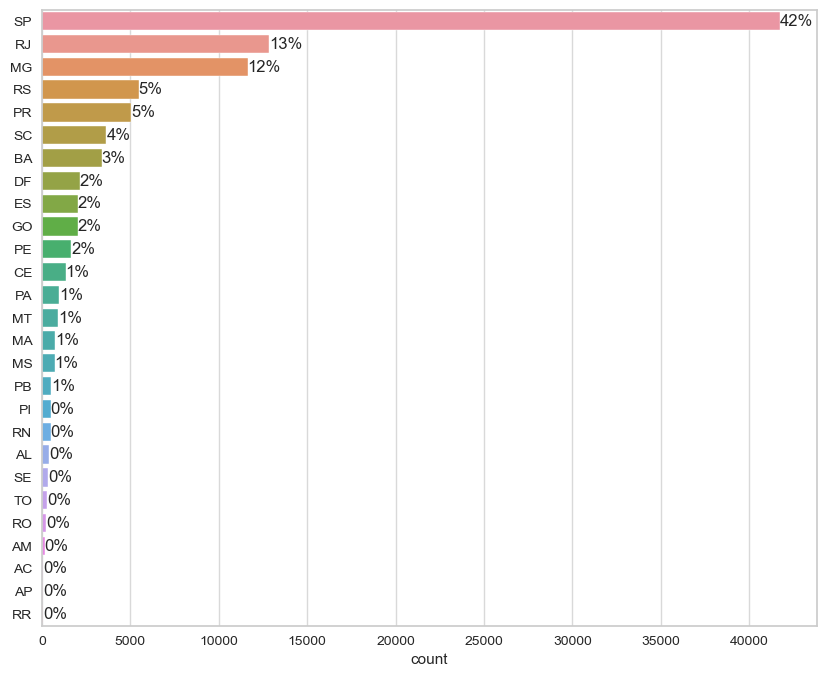

In [214]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.countplot(y=df_customers['customer_state'],
              order=df_customers['customer_state'].value_counts().index, ax=ax)

ax.bar_label(
    ax.containers[0], fmt=lambda x: '{:.0f}%'.format(
        x/df_customers.shape[0]*100)
)

plt.ylabel(ylabel=None)
plt.show()

All the customers come from Brazil, almost 2/3 of olist customers are from big developped states as Sao Paolo, Rio de Janeiro and Minas Gerais.

## Payments

In [215]:
df_payments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


We get the payment type and value from this dataset, but it has more items than in the orders dataset, it might be due to the fact that the payment was done in multiple times (payment_sequential)

In [216]:
df_payments['order_id'].nunique()

99440

In [217]:
df_payments.sort_values('payment_value', ascending=False).head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.0800
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.8800
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.3100
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.2100
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.6600
62409,2cc9089445046817a7539d90805e6e5a,1,boleto,1,6081.5400
43232,a96610ab360d42a2e5335a3998b4718a,1,credit_card,10,4950.3400
70320,b4c4b76c642808cbe472a32b86cddc95,1,credit_card,5,4809.4400
6440,199af31afc78c699f0dbf71fb178d4d4,1,credit_card,8,4764.3400
67546,8dbc85d1447242f3b127dda390d56e19,1,credit_card,8,4681.7800


Check different payment methods

In [430]:
df_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [434]:
df_payments['payment_type'].value_counts()

credit_card    76795
boleto         19784
voucher         5775
debit_card      1529
not_defined        3
Name: payment_type, dtype: int64

The most popular payment method is by credit card

Get the payment value per order

In [218]:
df_payments_grouped = df_payments.groupby(
    'order_id')['payment_value'].sum().reset_index()
df_payments_grouped.sort_values('payment_value', ascending=True).head(10)

,order_id,payment_value
27282,4637ca194b6387e2d538dc89b124b0ee,0.0000
251,00b1cb0320190ca0daa2c88b35206009,0.0000
78007,c8c528189310eaa44a745b8d9d26908b,0.0000
93949,f1d5c2e6867fa93ceee9ef9b34a53cbf,9.5900
90468,e8bbc1d69fee39eee4c72cb5c969e39d,10.0700
21343,37193e64eb9a46b7f3197762f242b20a,10.8900
27918,47d11383b93b217d96defbb2ef1a209b,11.5600
21997,38bcb524e1c38c2c1b60600a80fc8999,11.6200
54143,8bf12a5b441bd86a1edbccb6137c9b0b,11.6300
15418,27eebc49f55d8e9b8192f11c2570d6f1,11.6300


In [219]:
df_payments_grouped.describe()

,payment_value
count,99440.0000
mean,160.9903
std,221.9513
min,0.0000
25%,62.0100
50%,105.2900
75%,176.9700
max,13664.0800


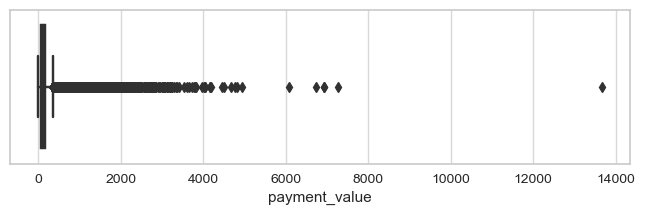

In [220]:
plt.figure(figsize=(8, 2))
sns.boxplot(x=df_payments_grouped['payment_value'])
plt.show()

There are payments with 0 value and payments with very high value.

In [221]:
df_payments.sort_values('payment_value').head(10)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
57411,00b1cb0320190ca0daa2c88b35206009,1,not_defined,1,0.0000
100766,b23878b3e8eb4d25a158f57d96331b18,4,voucher,1,0.0000
51280,4637ca194b6387e2d538dc89b124b0ee,1,not_defined,1,0.0000
36822,fa65dad1b0e818e3ccc5cb0e39231352,14,voucher,1,0.0000
77885,fa65dad1b0e818e3ccc5cb0e39231352,13,voucher,1,0.0000
19922,8bcbe01d44d147f901cd3192671144db,4,voucher,1,0.0000
94427,c8c528189310eaa44a745b8d9d26908b,1,not_defined,1,0.0000
62674,45ed6e85398a87c253db47c2d9f48216,3,voucher,1,0.0000
43744,6ccb433e00daae1283ccc956189c82ae,4,voucher,1,0.0000
17931,0218c7a4fb8d5b1bd22c82b783b8359c,1,credit_card,1,0.0100


Some of payments having value of 0 have been payed with a voucher and are part of a payment sequence, they are not erroneous, so it is ok to keep them.

In [222]:
df_payments.sort_values('payment_value', ascending=False).head(20)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
52107,03caa2c082116e1d31e67e9ae3700499,1,credit_card,1,13664.0800
34370,736e1922ae60d0d6a89247b851902527,1,boleto,1,7274.8800
41419,0812eb902a67711a1cb742b3cdaa65ae,1,credit_card,8,6929.3100
49581,fefacc66af859508bf1a7934eab1e97f,1,boleto,1,6922.2100
85539,f5136e38d1a14a4dbd87dff67da82701,1,boleto,1,6726.6600
62409,2cc9089445046817a7539d90805e6e5a,1,boleto,1,6081.5400
43232,a96610ab360d42a2e5335a3998b4718a,1,credit_card,10,4950.3400
70320,b4c4b76c642808cbe472a32b86cddc95,1,credit_card,5,4809.4400
6440,199af31afc78c699f0dbf71fb178d4d4,1,credit_card,8,4764.3400
67546,8dbc85d1447242f3b127dda390d56e19,1,credit_card,8,4681.7800


Payments with extreme value on the max side look accurate.

In [223]:
df_payments['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

## Products

In [224]:
df_products.sample(10)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
355,c354569eefd558bf201d0aedf35608ed,cama_mesa_banho,55.0000,166.0000,1.0000,700.0000,49.0000,4.0000,50.0000
6483,3bce6b72fbbfc2ec3bcffb83745cc24e,esporte_lazer,48.0000,566.0000,1.0000,200.0000,21.0000,25.0000,21.0000
21523,1ebde342c905182ffc07333fc569c590,cama_mesa_banho,23.0000,416.0000,2.0000,738.0000,38.0000,8.0000,24.0000
1948,cd8c7501d1e3a66f282dfed8dbd5ab9f,beleza_saude,53.0000,3954.0000,1.0000,3700.0000,40.0000,10.0000,20.0000
23742,8c061c83aadff7ca00360142d8c19c2d,beleza_saude,45.0000,1130.0000,1.0000,125.0000,17.0000,11.0000,12.0000
30001,db12039c7ff4e850d48e0312fa9b3473,cool_stuff,23.0000,652.0000,2.0000,575.0000,26.0000,20.0000,32.0000
10029,3d514fecadf6cef40a2a32a3c20cd1c8,brinquedos,46.0000,1533.0000,6.0000,350.0000,25.0000,16.0000,16.0000
13009,76397820b3556e99a4a2e3056eca24e5,artes,57.0000,734.0000,2.0000,1700.0000,32.0000,4.0000,32.0000
32832,11185dbab7a8593a8f117c4df8be18dd,moveis_decoracao,47.0000,1096.0000,1.0000,19700.0000,42.0000,100.0000,42.0000
1128,e40c9663823a220588b8f0c552ff5c03,fashion_roupa_masculina,54.0000,275.0000,2.0000,750.0000,40.0000,6.0000,35.0000


In [225]:
df_products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [226]:
df_products.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

There are precisely 610 products without name, category, description, photos

In [227]:
df_products_clean = df_products.loc[df_products['product_category_name'].notnull(
), :]
df_products_clean.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              1
product_length_cm             1
product_height_cm             1
product_width_cm              1
dtype: int64

In [228]:
df_products['product_category_name'].nunique()

73

In [229]:
df_products['product_category_name'].value_counts()

cama_mesa_banho                  3029
esporte_lazer                    2867
moveis_decoracao                 2657
beleza_saude                     2444
utilidades_domesticas            2335
                                 ... 
fashion_roupa_infanto_juvenil       5
casa_conforto_2                     5
pc_gamer                            3
seguros_e_servicos                  2
cds_dvds_musicais                   1
Name: product_category_name, Length: 73, dtype: int64

Merge the translated product categories

In [230]:
df_products_translated = df_products[['product_id', 'product_category_name'
                                      ]].merge(df_products_translations,
                                               on="product_category_name")

df_products_translated

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,6a2fb4dd53d2cdb88e0432f1284a004c,perfumaria,perfumery
2,0d009643171aee696f4733340bc2fdd0,perfumaria,perfumery
3,b1eae565a61935e0011ee7682fef9dc9,perfumaria,perfumery
4,8da90b37f0fb171b4877c124f965b1f6,perfumaria,perfumery
...,...,...,...
32323,13b25797ad1e6d6c7cd3cbeb35f8ee7a,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
32324,dc36a7859b743d8610a2bbbaea26ece9,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
32325,107fde0930956120d1e13dd1062fbb46,moveis_colchao_e_estofado,furniture_mattress_and_upholstery
32326,726b4e18f00255e2e63491bcba3f60b8,moveis_colchao_e_estofado,furniture_mattress_and_upholstery


In [231]:
df_products_translated.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32328 entries, 0 to 32327
Data columns (total 3 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_id                     32328 non-null  object
 1   product_category_name          32328 non-null  object
 2   product_category_name_english  32328 non-null  object
dtypes: object(3)
memory usage: 1010.2+ KB


In [232]:
df_products_translated.nunique()

product_id                       32328
product_category_name               71
product_category_name_english       71
dtype: int64

## Sellers

In [431]:
df_sellers.sample(10)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
3006,78ba5933c21686d1c2f64669c8c459e7,8810,mogi das cruzes,SP
1326,fb89df7f89fd1b8f03fa2acca1ba7364,85853,foz do iguacu,PR
501,f84a00e60c73a49e7e851c9bdca3a5bb,20756,rio de janeiro,RJ
867,079d295dcbf06ee8bb1b65ba964eb2b6,2124,sao paulo,SP
1450,1b8356dabde1d35e17cef975c3f82730,3477,sao paulo,SP
166,c8e135e7b21ecbc36c1153a29d2f5a06,1411,sao paulo,SP
487,5bc24d989e71e93c33e50a7782431b0e,37165,campo do meio,MG
1509,b6c6854d4d92a5f6f46be8869da3fa1a,1042,sao paulo,SP
969,dda37071807e404c5bb2a1590c66326f,3282,sao paulo,SP
367,217f005bb37ff3aeef5b2ae1788e75ba,6038,osasco,SP


In [432]:
df_sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


The sellers dataset contains 3095 platform sellers. This data can be used for an in-depth analysis to understand what sellers perform the best and generate more revenue but won't be used in this project.

# Aggregating datasets

We will need to merge the following datasets before proceding with the exploratory analysis:
- df_orders (base dataset)
- df_customers (to be able to group by unique customer)
- df_payments (to calculate total order value)
- df_order_items (to calculate number of items per order)
- df_order_reviews (to measure the customers satisfaction)
- df_products with translations

In [233]:
df_merged = (
    df_orders
    .merge(df_customers, on='customer_id')
    .merge(df_payments, on='order_id')
    .merge(df_order_items, on='order_id')
    .merge(df_grouped_reviews, on='order_id', how='left')
    .merge(df_products_translated, on='product_id', how='left')
)
df_merged.shape

(117601, 25)

The merge will perform an `inner` join for the customers, payments, items datasets, meaning that only intersection of order_id's will be taken in the resulting dataframe, and it will allow to automatically remove orders that don't have payments or items related to them. We perfom a left join for the reviews as it is optional data and we don't want to loose orders without a review. We do a left join for the products and their translations as not all the products categories are translated.

In [234]:
df_merged.head(10)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_zip_code_prefix,...,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,review_score,product_category_name,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.1200,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.9900,8.7200,4.0000,utilidades_domesticas,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,2.0000,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.9900,8.7200,4.0000,utilidades_domesticas,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18,7c396fd4830fd04220f754e42b4e5bff,3149,...,18.5900,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,2017-10-06 11:07:15,29.9900,8.7200,4.0000,utilidades_domesticas,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13,af07308b275d755c9edb36a90c618231,47813,...,141.4600,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,2018-07-30 03:24:27,118.7000,22.7600,4.0000,perfumaria,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04,3a653a41f6f9fc3d2a113cf8398680e8,75265,...,179.1200,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,2018-08-13 08:55:23,159.9000,19.2200,5.0000,automotivo,auto
5,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15,7c142cf63193a1473d2e66489a9ae977,59296,...,72.2000,1,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,2017-11-23 19:45:59,45.0000,27.2000,5.0000,pet_shop,pet_shop
6,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26,72632f0f9dd73dfee390c9b22eb56dd6,9195,...,28.6200,1,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,2018-02-19 20:31:37,19.9000,8.7200,5.0000,papelaria,stationery
7,a4591c265e18cb1dcee52889e2d8acc3,503740e9ca751ccdda7ba28e9ab8f608,delivered,2017-07-09 21:57:05,2017-07-09 22:10:13,2017-07-11 14:58:04,2017-07-26 10:57:55,2017-08-01,80bb27c7c16e8f973207a5086ab329e2,86320,...,175.2600,1,060cb19345d90064d1015407193c233d,8581055ce74af1daba164fdbd55a40de,2017-07-13 22:10:13,147.9000,27.3600,4.0000,automotivo,auto
8,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaT,NaT,2017-05-09,36edbb3fb164b1f16485364b6fb04c73,98900,...,65.9500,1,a1804276d9941ac0733cfd409f5206eb,dc8798cbf453b7e0f98745e396cc5616,2017-04-19 13:25:17,49.9000,16.0500,2.0000,NaN,NaN
9,6514b8ad8028c9f2cc2374ded245783f,9bdf08b4b3b52b5526ff42d37d47f222,delivered,2017-05-16 13:10:30,2017-05-16 13:22:11,2017-05-22 10:07:46,2017-05-26 12:55:51,2017-06-07,932afa1e708222e5821dac9cd5db4cae,26525,...,75.1600,1,4520766ec412348b8d4caa5e8a18c464,16090f2ca825584b5a147ab24aa30c86,2017-05-22 13:22:11,59.9900,15.1700,5.0000,automotivo,auto


In [235]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 25 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117601 non-null  object        
 1   customer_id                    117601 non-null  object        
 2   order_status                   117601 non-null  object        
 3   order_purchase_timestamp       117601 non-null  datetime64[ns]
 4   order_approved_at              117586 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116356 non-null  datetime64[ns]
 6   order_delivered_customer_date  115034 non-null  datetime64[ns]
 7   order_estimated_delivery_date  117601 non-null  datetime64[ns]
 8   customer_unique_id             117601 non-null  object        
 9   customer_zip_code_prefix       117601 non-null  int64         
 10  customer_city                  117601 non-null  object        
 11  

## Cleaning

In [236]:
df_merged.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date    2567
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
review_score                      978
product_category_name            1723
product_category_name_english    1723
dtype: int64

**Fill in the missing delivery dates**

We could calculate the average delivery period but it seems more consistent to take the estimated delivery date as the company has already its own algorithm to calculate it.

In [237]:
df_merged['order_delivered_customer_date'] = df_merged['order_delivered_customer_date'].fillna(
    df_merged['order_estimated_delivery_date'])

df_merged.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
review_score                      978
product_category_name            1723
product_category_name_english    1723
dtype: int64

**Fill review score by the mean**

In [238]:
df_merged['review_score'] = df_merged['review_score'].fillna(
    round(df_merged['review_score'].mean()))
df_merged.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
review_score                        0
product_category_name            1723
product_category_name_english    1723
dtype: int64

**Fill the unknown product categories**

In [239]:
df_merged['product_category_name_english'] = df_merged['product_category_name_english'].fillna(
    "Unknown")
df_merged.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                  15
order_delivered_carrier_date     1245
order_delivered_customer_date       0
order_estimated_delivery_date       0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                       0
product_id                          0
seller_id                           0
shipping_limit_date                 0
price                               0
freight_value                       0
review_score                        0
product_category_name            1723
product_category_name_english       0
dtype: int64

**Keep the most relevant columns**

In [240]:
df_merged = df_merged.drop(columns=[
    'order_approved_at', 'order_delivered_carrier_date', 'order_estimated_delivery_date',
    'customer_zip_code_prefix', 'customer_state', 'payment_installments',
    'shipping_limit_date', 'freight_value', 'product_category_name'
])
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 117601 entries, 0 to 117600
Data columns (total 16 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       117601 non-null  object        
 1   customer_id                    117601 non-null  object        
 2   order_status                   117601 non-null  object        
 3   order_purchase_timestamp       117601 non-null  datetime64[ns]
 4   order_delivered_customer_date  117601 non-null  datetime64[ns]
 5   customer_unique_id             117601 non-null  object        
 6   customer_city                  117601 non-null  object        
 7   payment_sequential             117601 non-null  int64         
 8   payment_type                   117601 non-null  object        
 9   payment_value                  117601 non-null  float64       
 10  order_item_id                  117601 non-null  int64         
 11  

## Outliers

In the previous steps we saw high extreme values for the **payment value**. However, these values look consistent and real, we will keep them because they can provide a meaningful insights about certain customers and should be taken in consideration in the customer segmentation.


# Exploratory analysis

The ideas to explore:
1. What are the most profitable periods for the company?
2. How many customers made more than 1 order?
3. How many items per order?
4. What is a global customer satisfaction per order?
5. What product categories are the most popular?

## Orders per month

Group all orders by the year and month

In [241]:
orders_by_month = df_merged.groupby(
    df_merged.order_purchase_timestamp.dt.to_period(
        'M'))['order_id'].nunique().reset_index().rename(columns={'order_id': 'Number of orders'})


orders_by_month['order_purchase_timestamp'] = orders_by_month['order_purchase_timestamp'].astype(
    str)
orders_by_month

,order_purchase_timestamp,Number of orders
0,2016-09,2
1,2016-10,308
2,2016-12,1
3,2017-01,789
4,2017-02,1733
5,2017-03,2641
6,2017-04,2391
7,2017-05,3660
8,2017-06,3217
9,2017-07,3969


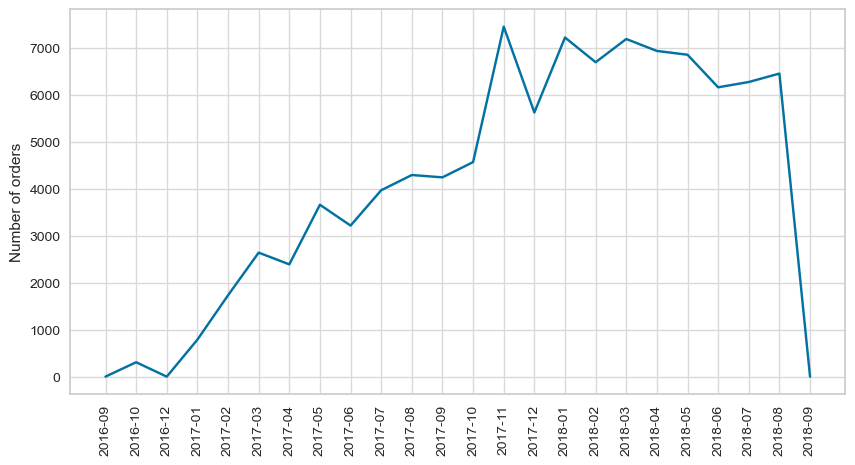

In [242]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=orders_by_month,
             x="order_purchase_timestamp", y="Number of orders")
plt.xticks(rotation=90)
plt.xlabel(xlabel='')
plt.show()

We observe a consistent growth in the number of orders from September 2016, starting from a small amount (<1000) to the highest month in number of orders (7451) November 2017. The Olist company was found in 2015, it can explain why there were not many orders in the beginning.

November 2017 was the month with the most orders, probably due to the Black Friday promotion period. It can also explain a drop in orders for the following month of December as the customers have already bought Christmas presents during the Black Friday. We see a high steady number of orders for the first half of 2018. 

## Revenue

To calculate the total value of each order, we will have to group by and sum payments by the `order_id`

In [417]:
df_payments_grouped = df_merged[[
    'order_id', 'order_purchase_timestamp', 'payment_sequential', 'payment_value'
]].drop_duplicates().groupby(['order_id', 'order_purchase_timestamp'])['payment_value'].sum().reset_index()

df_payments_grouped.head(10)

,order_id,order_purchase_timestamp,payment_value
0,00010242fe8c5a6d1ba2dd792cb16214,2017-09-13 08:59:02,72.1900
1,00018f77f2f0320c557190d7a144bdd3,2017-04-26 10:53:06,259.8300
2,000229ec398224ef6ca0657da4fc703e,2018-01-14 14:33:31,216.8700
3,00024acbcdf0a6daa1e931b038114c75,2018-08-08 10:00:35,25.7800
4,00042b26cf59d7ce69dfabb4e55b4fd9,2017-02-04 13:57:51,218.0400
5,00048cc3ae777c65dbb7d2a0634bc1ea,2017-05-15 21:42:34,34.5900
6,00054e8431b9d7675808bcb819fb4a32,2017-12-10 11:53:48,31.7500
7,000576fe39319847cbb9d288c5617fa6,2018-07-04 12:08:27,880.7500
8,0005a1a1728c9d785b8e2b08b904576c,2018-03-19 18:40:33,157.6000
9,0005f50442cb953dcd1d21e1fb923495,2018-07-02 13:59:39,65.3900


In [412]:
df_payments_grouped.describe()

,payment_value
count,98665.0000
mean,160.6069
std,220.4843
min,9.5900
25%,62.0000
50%,105.2900
75%,176.8800
max,13664.0800


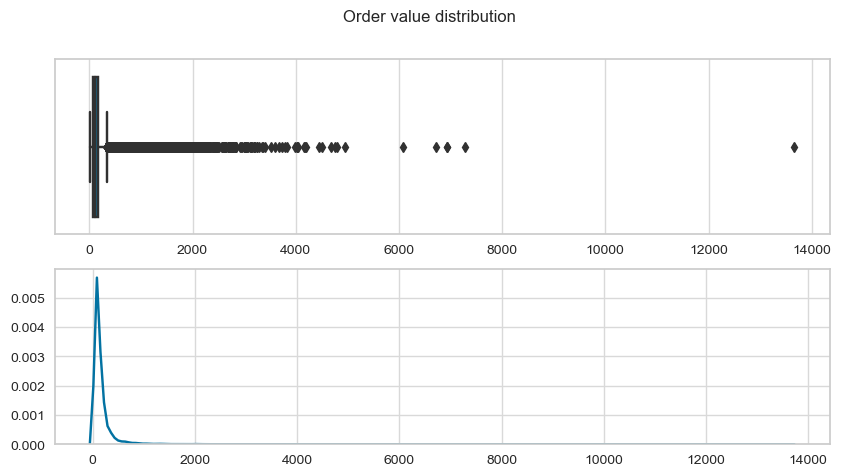

In [413]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
fig.suptitle('Order value distribution', fontsize=12)

sns.boxplot(x=df_payments_grouped['payment_value'], ax=ax1)
ax1.set(xlabel=None)

sns.kdeplot(x=df_payments_grouped['payment_value'], ax=ax2)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
plt.show()

As we already detected before, there are orders with very high values, but the median value is 105 BRL.

**Revenue per month**

Let's check if the revenue by month follows the number of orders graph.

In [422]:
df_payments_grouped.sort_values('order_purchase_timestamp').head(10)

,order_id,order_purchase_timestamp,payment_value
17782,2e7a8482f6fb09756ca50c10d7bfc047,2016-09-04 21:15:19,136.2300
88783,e5fa5a7210941f7d56d0208e4e071d35,2016-09-05 00:15:34,75.0600
43609,71303d7e93b399f5bcd537d124c0bcfa,2016-10-02 22:07:52,109.3400
22862,3b697a20d9e427646d92567910af6d57,2016-10-03 09:44:50,45.4600
73321,be5bc2f0da14d8071e2d45451ad119d9,2016-10-03 16:56:50,39.0900
39181,65d1e226dfaeb8cdc42f665422522d14,2016-10-03 21:01:41,35.6100
62939,a41c8759fbe7aab36ea07e038b2d4465,2016-10-03 21:13:36,53.7300
81018,d207cc272675637bfed0062edffd0818,2016-10-03 22:06:03,133.4600
79090,cd3b8574c82b42fc8129f6d502690c3e,2016-10-03 22:31:31,40.9500
67062,ae8a60e4b03c5a4ba9ca0672c164b181,2016-10-03 22:44:10,154.5700


In [414]:
revenue_by_month = df_payments_grouped.groupby(
    df_payments_grouped.order_purchase_timestamp.dt.to_period(
        'M'))['payment_value'].sum().reset_index().rename(columns={'payment_value': 'Revenue by month'})


revenue_by_month['order_purchase_timestamp'] = revenue_by_month['order_purchase_timestamp'].astype(
    str)
revenue_by_month

,order_purchase_timestamp,Revenue by month
0,2016-09,211.2900
1,2016-10,56884.8900
2,2016-12,19.6200
3,2017-01,137251.7900
4,2017-02,286340.8700
5,2017-03,432087.0300
6,2017-04,412562.0100
7,2017-05,586406.2800
8,2017-06,503138.2700
9,2017-07,585076.4700


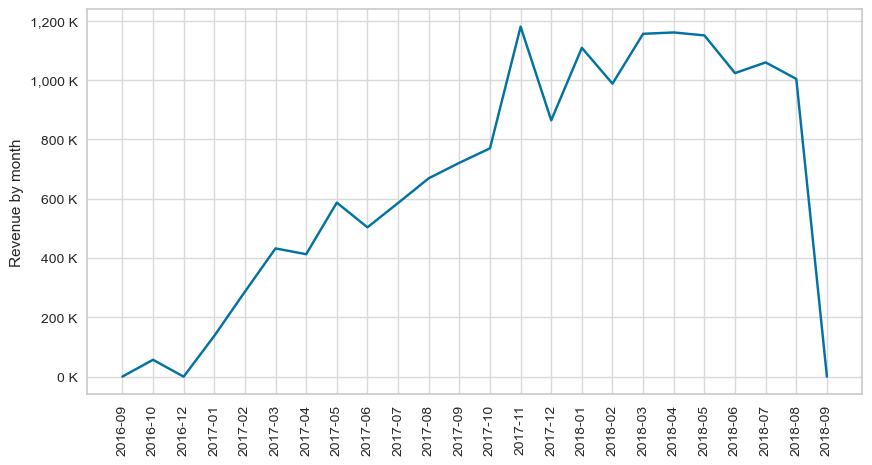

In [429]:
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(data=revenue_by_month, x="order_purchase_timestamp",
             y="Revenue by month", ax=ax)
plt.xticks(rotation=90)
plt.xlabel(xlabel='')
plt.ticklabel_format(style='plain', axis='y')
ax.yaxis.set_major_formatter(ticker.FuncFormatter(
    lambda y, pos: '{:,.0f}'.format(y/1000) + ' K'))
plt.show()

We have the same tendency as with the previous graph, steady growth from September 2016 to November 2017 which stays the best month in revenue too, then high values for 2018

## Orders per customer

How many orders were made by each customer?

In [246]:
df_customers_grouped = df_merged.groupby('customer_unique_id')[
    'order_id'].nunique().reset_index()
df_customers_grouped

,customer_unique_id,order_id
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,1
95415,fffea47cd6d3cc0a88bd621562a9d061,1
95416,ffff371b4d645b6ecea244b27531430a,1
95417,ffff5962728ec6157033ef9805bacc48,1


In [247]:
df_customers_grouped.describe()

,order_id
count,95419.0000
mean,1.0340
std,0.2112
min,1.0000
25%,1.0000
50%,1.0000
75%,1.0000
max,16.0000


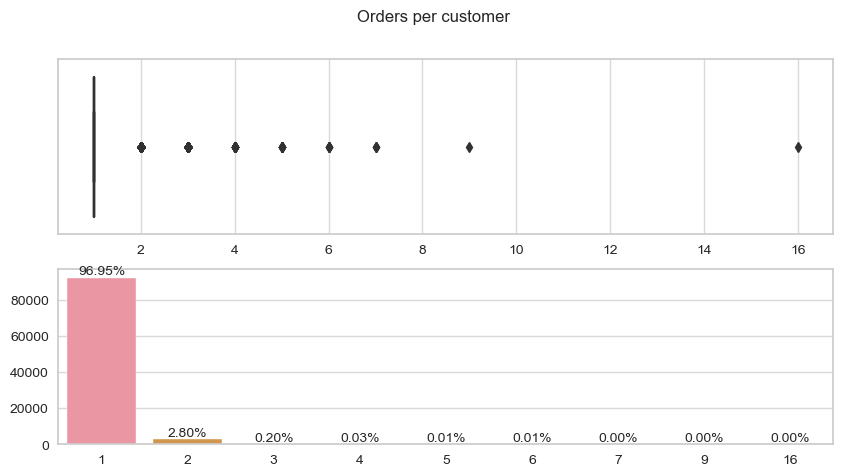

In [313]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
fig.suptitle('Orders per customer', fontsize=12)

sns.boxplot(x=df_customers_grouped['order_id'], ax=ax1)
ax1.set(xlabel=None)

sns.countplot(x=df_customers_grouped['order_id'], ax=ax2)
ax2.bar_label(
    ax2.containers[0], fmt=lambda x: '{:.2f}%'.format(x/df_customers_grouped.shape[0]*100), fontsize=10
)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
plt.show()

97% of customers made only 1 order. We see exceptional cases of customers having made more than 2 orders and up to 16 orders.

In [325]:
df_customers_grouped["Number of orders"] = np.where(
    df_customers_grouped["order_id"] > 3, '>3',
    df_customers_grouped["order_id"])

df_customers_grouped

,customer_unique_id,order_id,Number of orders
0,0000366f3b9a7992bf8c76cfdf3221e2,1,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,1
2,0000f46a3911fa3c0805444483337064,1,1
3,0000f6ccb0745a6a4b88665a16c9f078,1,1
4,0004aac84e0df4da2b147fca70cf8255,1,1
...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,1,1
95415,fffea47cd6d3cc0a88bd621562a9d061,1,1
95416,ffff371b4d645b6ecea244b27531430a,1,1
95417,ffff5962728ec6157033ef9805bacc48,1,1


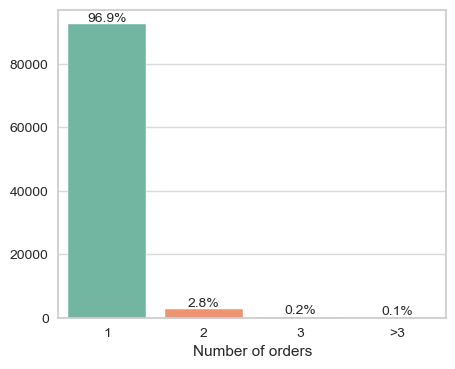

In [355]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))

sns.countplot(
    x=df_customers_grouped["Number of orders"], ax=ax, palette="Set2")
ax.bar_label(
    ax.containers[0], fmt=lambda x: '{:.1f}%'.format(x/df_customers_grouped.shape[0]*100), fontsize=10
)
ax.set(xlabel="Number of orders")
ax.set(ylabel=None)
plt.show()

([<matplotlib.patches.Wedge at 0x2e63d7850>,
 [Text(-1.0949447802740238, 0.10533721161427313, '1'),
  Text(1.0940782608980453, -0.11398578433431576, '2'),
  Text(1.0999505507456486, -0.010430048626178032, '3'),
  Text(1.0999986266316428, -0.0017382199227534364, '>3')],
 [Text(-0.5972426074221947, 0.057456660880512614, '96.9%'),
  Text(0.5967699604898428, -0.06217406418235404, '2.8%'),
  Text(0.5999730276794447, -0.005689117432460745, '0.2%'),
  Text(0.5999992508899868, -0.0009481199578655106, '0.1%')])

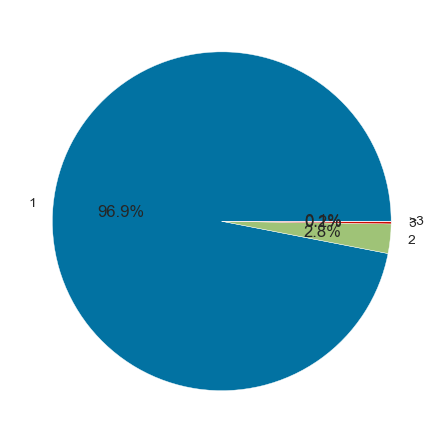

In [343]:
total = df_customers_grouped["Number of orders"].value_counts().values.sum()


def fmt(x):
    return '{:.1f}%'.format(x)


plt.pie(df_customers_grouped["Number of orders"].value_counts().values,
        labels=df_customers_grouped["Number of orders"].value_counts().index,
        autopct=fmt)

Only 3% of customers have passed more than 1 order on the platform, a possible explanation (that will need a more detailed analysis and is not in the scope of the current project) will be that same customers keep creating new accounts in order to benefit of the welcome promotions. 

## Items per order

How many items per order? Do customers make bulk orders or prefer buying small amount of items but regularly?

In [318]:
df_items_grouped = df_merged.groupby('order_id')['order_item_id'].max(
).reset_index().rename(columns={'order_item_id': 'Number of items'})
df_items_grouped

,order_id,Number of items
0,00010242fe8c5a6d1ba2dd792cb16214,1
1,00018f77f2f0320c557190d7a144bdd3,1
2,000229ec398224ef6ca0657da4fc703e,1
3,00024acbcdf0a6daa1e931b038114c75,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1
...,...,...
98660,fffc94f6ce00a00581880bf54a75a037,1
98661,fffcd46ef2263f404302a634eb57f7eb,1
98662,fffce4705a9662cd70adb13d4a31832d,1
98663,fffe18544ffabc95dfada21779c9644f,1


In [319]:
df_items_grouped.describe()

,Number of items
count,98665.0000
mean,1.1417
std,0.5384
min,1.0000
25%,1.0000
50%,1.0000
75%,1.0000
max,21.0000


In average the order contains 1.4 items, and we also observe orders having up to 21 items.

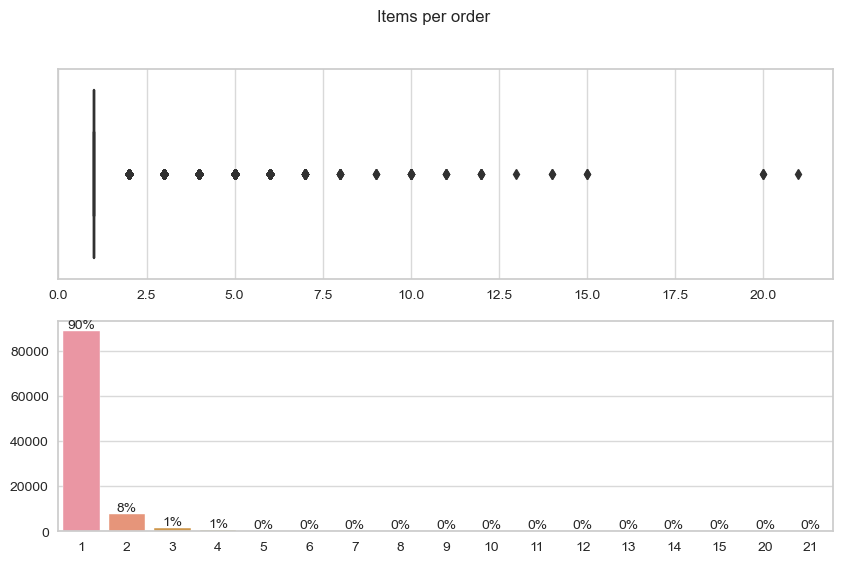

In [324]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 6))
fig.suptitle('Items per order', fontsize=12)

sns.boxplot(x=df_items_grouped['Number of items'], ax=ax1)
ax1.set(xlabel=None)

sns.countplot(x=df_items_grouped['Number of items'], ax=ax2)
ax2.bar_label(
    ax2.containers[0], fmt=lambda x: '{:.0f}%'.format(x/df_items_grouped.shape[0]*100), fontsize=10
)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
plt.show()

In [352]:
df_items_grouped["Items count"] = np.where(
    df_items_grouped["Number of items"] > 2, '>2',
    df_items_grouped["Number of items"])

df_items_grouped

,order_id,Number of items,Items count
0,00010242fe8c5a6d1ba2dd792cb16214,1,1
1,00018f77f2f0320c557190d7a144bdd3,1,1
2,000229ec398224ef6ca0657da4fc703e,1,1
3,00024acbcdf0a6daa1e931b038114c75,1,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,1
...,...,...,...
98660,fffc94f6ce00a00581880bf54a75a037,1,1
98661,fffcd46ef2263f404302a634eb57f7eb,1,1
98662,fffce4705a9662cd70adb13d4a31832d,1,1
98663,fffe18544ffabc95dfada21779c9644f,1,1


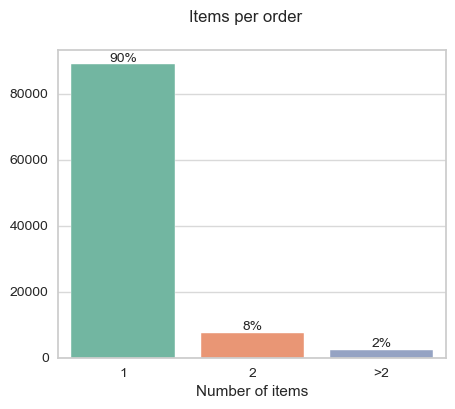

In [354]:
fig, ax = plt.subplots(1, 1, figsize=(5, 4))
fig.suptitle('Items per order', fontsize=12)

sns.countplot(x=df_items_grouped['Items count'], ax=ax, palette="Set2")
ax.bar_label(
    ax.containers[0], fmt=lambda x: '{:.0f}%'.format(x/df_items_grouped.shape[0]*100), fontsize=10
)
ax.set(xlabel="Number of items")
ax.set(ylabel=None)
plt.show()

10% of orders have more than 1 item in them. Olist customers prefer buying 1 unit instead of making bulk orders.

## Order review score

Check how the review scores are distributed among the orders

In [291]:
df_reviews_grouped = df_merged.groupby('order_id')['review_score'].mean().reset_index()
df_reviews_grouped

,order_id,review_score
0,00010242fe8c5a6d1ba2dd792cb16214,5.0000
1,00018f77f2f0320c557190d7a144bdd3,4.0000
2,000229ec398224ef6ca0657da4fc703e,5.0000
3,00024acbcdf0a6daa1e931b038114c75,4.0000
4,00042b26cf59d7ce69dfabb4e55b4fd9,5.0000
...,...,...
98660,fffc94f6ce00a00581880bf54a75a037,5.0000
98661,fffcd46ef2263f404302a634eb57f7eb,5.0000
98662,fffce4705a9662cd70adb13d4a31832d,5.0000
98663,fffe18544ffabc95dfada21779c9644f,5.0000


In [400]:
df_reviews_grouped['review_score'] = df_reviews_grouped['review_score'].astype(
    'int')
df_reviews_grouped['review_score'].unique()

array([5, 4, 1, 3, 2])

In [402]:
df_reviews_grouped.describe()

,review_score
count,98665.0000
mean,4.1040
std,1.3254
min,1.0000
25%,4.0000
50%,5.0000
75%,5.0000
max,5.0000


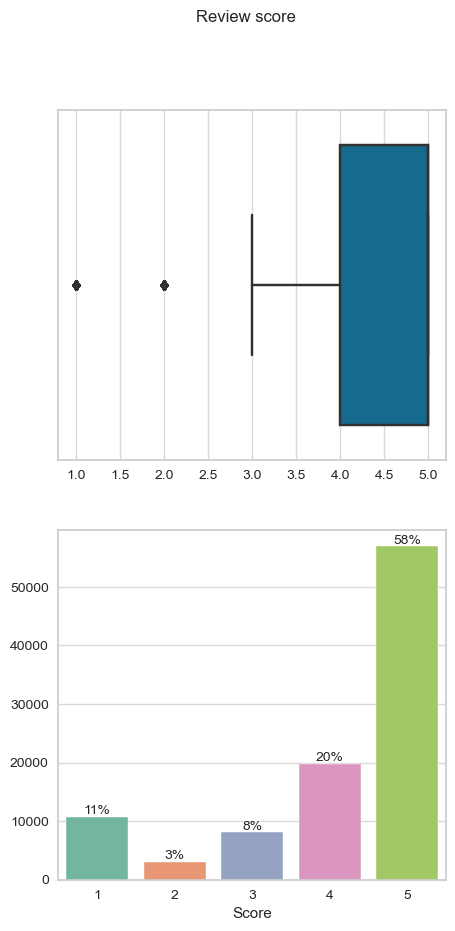

In [403]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(5, 10))
fig.suptitle('Review score', fontsize=12)

sns.boxplot(x=df_reviews_grouped['review_score'], ax=ax1)
ax1.set(xlabel=None)

sns.countplot(x=df_reviews_grouped['review_score'], ax=ax2, palette="Set2")
ax2.bar_label(
    ax2.containers[0], fmt=lambda x: '{:.0f}%'.format(x/df_reviews_grouped.shape[0]*100), fontsize=10
)
ax2.set(xlabel="Score", ylabel=None)
plt.show()

([<matplotlib.patches.Wedge at 0x2e867f430>,
 [Text(-0.2619848728615093, 1.0683463513260758, '5'),
  Text(-0.48726669604024236, -0.9861902285715602, '4'),
  Text(0.5419525902008286, -0.9572290164713002, '1'),
  Text(0.9880525331470751, -0.4834792567852817, '3'),
  Text(1.0946318400252675, -0.1085409360697481, '2')],
 [Text(-0.1429008397426414, 0.5827343734505868, '58%'),
  Text(-0.26578183420376855, -0.5379219428572146, '20%'),
  Text(0.29561050374590647, -0.5221249180752546, '11%'),
  Text(0.53893774535295, -0.2637159582465173, '8%'),
  Text(0.597071912741055, -0.059204146947135314, '3%')])

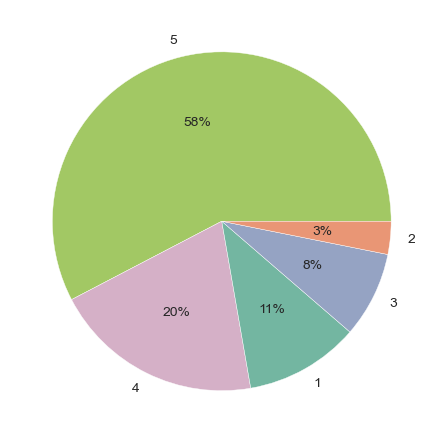

In [404]:
score_value_counts = df_reviews_grouped["review_score"].value_counts()

plt.pie(
    score_value_counts.values,
    labels=score_value_counts.index,
    autopct='%.0f%%',
    colors=['#A2C864', '#D5B0C7', '#73B6A1', '#95A3C3', '#E99675'],
    textprops={'size': 10})

We can conclude that customers are globally satisfied with the orders (78% of orders having the score of 4 and 5), but there is still a high percentage of unsatisfied clients (14% gave 1 or 2 scores)

## Product categories

What product categories are the most popular among the customers?

In [256]:
top_products = df_merged['product_category_name_english'].value_counts()
top_products.head(20)

bed_bath_table              11823
health_beauty                9972
sports_leisure               8945
furniture_decor              8744
computers_accessories        8082
housewares                   7355
watches_gifts                6201
telephony                    4721
garden_tools                 4574
auto                         4379
toys                         4273
cool_stuff                   3987
perfumery                    3560
baby                         3196
electronics                  2845
stationery                   2617
fashion_bags_accessories     2151
pet_shop                     2028
office_furniture             1778
Unknown                      1723
Name: product_category_name_english, dtype: int64

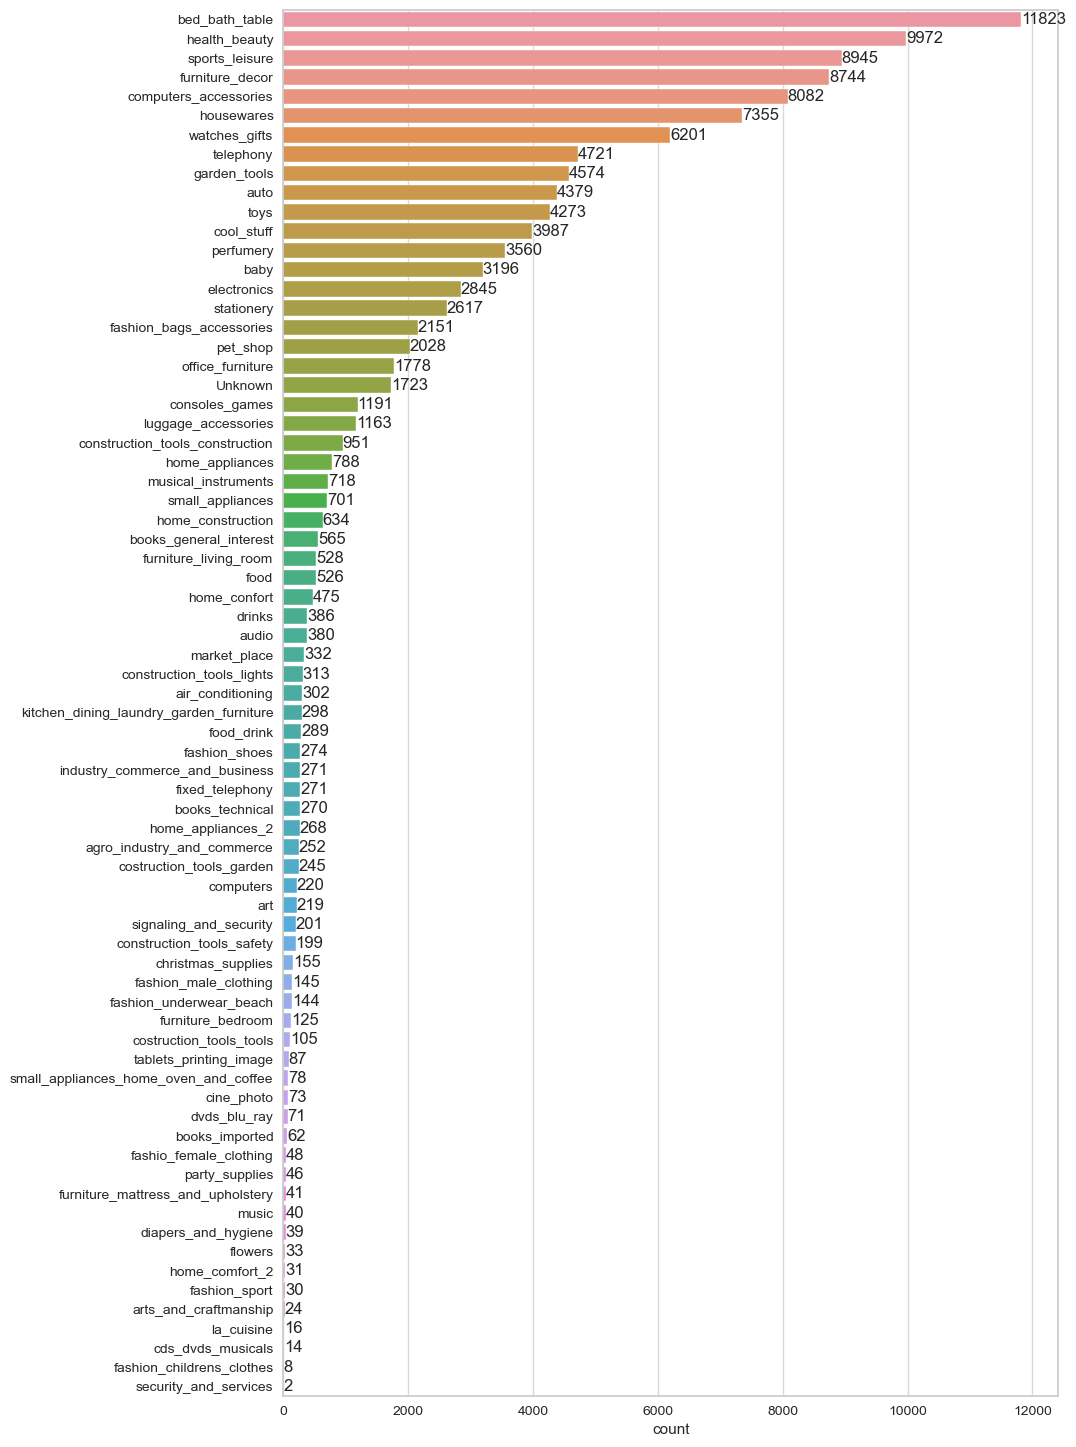

In [257]:
fig, ax = plt.subplots(figsize=(10, 18))

sns.countplot(y=df_merged['product_category_name_english'],
              order=df_merged['product_category_name_english'].value_counts().index, ax=ax)
ax.bar_label(ax.containers[0])

plt.ylabel(ylabel=None)
plt.show()

We see that Olist has a huge variaty of different product categories (home, sports, technology, beauty and fashion products, food and drinks, etc), it is not obvious to see a tendency for a particular category

**Price**

Check the price range of the items.

In [200]:
df_order_items['product_id'].nunique()

32951

In [201]:
df_items_products = df_order_items.groupby(
    'product_id')['price'].mean().reset_index()

df_items_products

,product_id,price
0,00066f42aeeb9f3007548bb9d3f33c38,101.6500
1,00088930e925c41fd95ebfe695fd2655,129.9000
2,0009406fd7479715e4bef61dd91f2462,229.0000
3,000b8f95fcb9e0096488278317764d19,58.9000
4,000d9be29b5207b54e86aa1b1ac54872,199.0000
...,...,...
32946,fff6177642830a9a94a0f2cba5e476d1,114.9900
32947,fff81cc3158d2725c0655ab9ba0f712c,90.0000
32948,fff9553ac224cec9d15d49f5a263411f,32.0000
32949,fffdb2d0ec8d6a61f0a0a0db3f25b441,33.9900


In [202]:
df_items_products.describe()

,price
count,32951.0000
mean,145.3025
std,246.8958
min,0.8500
25%,39.9000
50%,79.0000
75%,154.9000
max,6735.0000


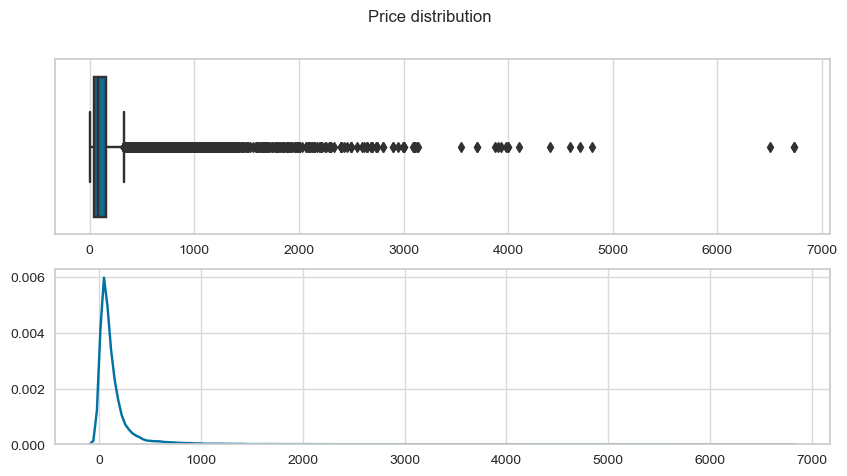

In [203]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
fig.suptitle('Price distribution', fontsize=12)

sns.boxplot(x=df_items_products['price'], ax=ax1)
ax1.set(xlabel=None)

sns.kdeplot(x=df_items_products['price'], ax=ax2)
ax2.set(xlabel=None)
ax2.set(ylabel=None)
plt.show()

We can also see a big variety of prices, starting from 0.85 to 6735 BRL, the median price however is 79 BRL. 

# RFM

The RFM (Recency/Frequency/Monetary) dataset is a useful tool in marketing for the customer analysis, it will allow us to group the most important features by unique customer.

We will use the following strategy to create RFM variables:

1. `Recency`:  
    - keep the most recent purchase date for each unique customer
    - calculate the difference in days between the most recent purchase date in the dataset and the most recent for each customer. <br/><br/>
    
2. `Frequency`:
    - calculate number of orders for each unique customer <br/><br/>
    
    
3. `Monetary`:
    - calculate the total payment value of the orders for each unique customer <br/> <br/>
    
We will also use the review score as an additional parameter to represent the customer satisfaction

4. `Satisfaction` 
    - calculate the average review score per customer
    
    
We will use intermediate datasets to make sure that all data is correctly calculated (to avoid duplicates, errors, etc)

## Recency

Get the difference in days between the most recent order of the dataset and the most recent order of the customer

In [258]:
df_merged

,order_id,customer_id,order_status,order_purchase_timestamp,order_delivered_customer_date,customer_unique_id,customer_city,payment_sequential,payment_type,payment_value,order_item_id,product_id,seller_id,price,review_score,product_category_name_english
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,1,credit_card,18.1200,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.9900,4.0000,housewares
1,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,3,voucher,2.0000,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.9900,4.0000,housewares
2,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-10 21:25:13,7c396fd4830fd04220f754e42b4e5bff,sao paulo,2,voucher,18.5900,1,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,29.9900,4.0000,housewares
3,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-08-07 15:27:45,af07308b275d755c9edb36a90c618231,barreiras,1,boleto,141.4600,1,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,118.7000,4.0000,perfumery
4,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-17 18:06:29,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,1,credit_card,179.1200,1,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,159.9000,5.0000,auto
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117596,63943bddc261676b46f01ca7ac2f7bd8,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,2018-02-28 17:37:56,da62f9e57a76d978d02ab5362c509660,praia grande,1,credit_card,195.0000,1,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,174.9000,4.0000,baby
117597,83c1379a015df1e13d02aae0204711ab,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,2017-09-21 11:24:17,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,1,credit_card,271.0100,1,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,205.9900,5.0000,home_appliances_2
117598,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,japuiba,1,credit_card,441.1600,1,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.9900,2.0000,computers_accessories
117599,11c177c8e97725db2631073c19f07b62,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,2018-01-25 23:32:54,5097a5312c8b157bb7be58ae360ef43c,japuiba,1,credit_card,441.1600,2,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,179.9900,2.0000,computers_accessories


In [259]:
df_merged['customer_unique_id'].nunique()

95419

In [260]:
df_recency = df_merged.groupby(
    'customer_unique_id')['order_purchase_timestamp'].max().reset_index().rename(
        columns={'order_purchase_timestamp': 'latest_purchase_date'})

df_recency

,customer_unique_id,latest_purchase_date
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-05-10 10:56:27
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-05-07 11:11:27
2,0000f46a3911fa3c0805444483337064,2017-03-10 21:05:03
3,0000f6ccb0745a6a4b88665a16c9f078,2017-10-12 20:29:41
4,0004aac84e0df4da2b147fca70cf8255,2017-11-14 19:45:42
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2017-06-08 21:00:36
95415,fffea47cd6d3cc0a88bd621562a9d061,2017-12-10 20:07:56
95416,ffff371b4d645b6ecea244b27531430a,2017-02-07 15:49:16
95417,ffff5962728ec6157033ef9805bacc48,2018-05-02 15:17:41


In [261]:
df_recency['Recency'] = (df_recency['latest_purchase_date'].max(
) - df_recency['latest_purchase_date']).dt.days

print(df_recency['latest_purchase_date'].max())
df_recency.sort_values('Recency').head(10)

2018-09-03 09:06:57


,customer_unique_id,latest_purchase_date,Recency
95082,ff22e30958c13ffe219db7d711e8f564,2018-09-03 09:06:57,0
47802,7febafa06d9d8f232a900a2937f04338,2018-08-29 14:18:28,4
68311,b701bebbdf478f5500348f03aff62121,2018-08-29 14:52:00,4
13741,24ac2b4327e25baf39f2119e4228976a,2018-08-29 15:00:37,4
12704,21dbe8eabd00b34492a939c540e2b1a7,2018-08-29 10:22:35,4
1538,0421e7a23f21e5d54efed456aedbc513,2018-08-29 11:06:11,4
45599,7a22d14aa3c3599238509ddca4b93b01,2018-08-29 12:25:59,4
67517,b4dcade04bc548b7e3b0243c801f8c26,2018-08-29 09:14:11,4
4676,0c6d7218d5f3fa14514fd29865269993,2018-08-29 09:48:09,4
34576,5c58de6fb80e93396e2f35642666b693,2018-08-29 14:18:23,4


In [262]:
df_recency = df_recency.drop(columns=['latest_purchase_date'])
df_recency

,customer_unique_id,Recency
0,0000366f3b9a7992bf8c76cfdf3221e2,115
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118
2,0000f46a3911fa3c0805444483337064,541
3,0000f6ccb0745a6a4b88665a16c9f078,325
4,0004aac84e0df4da2b147fca70cf8255,292
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,451
95415,fffea47cd6d3cc0a88bd621562a9d061,266
95416,ffff371b4d645b6ecea244b27531430a,572
95417,ffff5962728ec6157033ef9805bacc48,123


## Frequency

Calculate the number of orders per unique customer

In [263]:
df_frequency = df_merged.groupby('customer_unique_id')['order_id'].nunique(
).reset_index().rename(columns={'order_id': 'Frequency'})

df_frequency

,customer_unique_id,Frequency
0,0000366f3b9a7992bf8c76cfdf3221e2,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1
2,0000f46a3911fa3c0805444483337064,1
3,0000f6ccb0745a6a4b88665a16c9f078,1
4,0004aac84e0df4da2b147fca70cf8255,1
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,1
95415,fffea47cd6d3cc0a88bd621562a9d061,1
95416,ffff371b4d645b6ecea244b27531430a,1
95417,ffff5962728ec6157033ef9805bacc48,1


## Monetary

Calculate the total value of all orders for each customer.

As there are duplicated lines created by the merge with the items dataset, we should be careful for the calculation of the total amount.

In [264]:
df_monetary = df_merged[[
    'order_id', 'customer_unique_id', 'payment_sequential', 'payment_value'
]].drop_duplicates().groupby([
    'customer_unique_id'
])['payment_value'].sum().reset_index().rename(columns={'payment_value': 'Monetary'})

df_monetary

,customer_unique_id,Monetary
0,0000366f3b9a7992bf8c76cfdf3221e2,141.9000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.1900
2,0000f46a3911fa3c0805444483337064,86.2200
3,0000f6ccb0745a6a4b88665a16c9f078,43.6200
4,0004aac84e0df4da2b147fca70cf8255,196.8900
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,2067.4200
95415,fffea47cd6d3cc0a88bd621562a9d061,84.5800
95416,ffff371b4d645b6ecea244b27531430a,112.4600
95417,ffff5962728ec6157033ef9805bacc48,133.6900


## Satisfaction

Calculate the average review score per customer

In [265]:
df_satisfaction = df_merged.groupby('customer_unique_id')['review_score'].mean(
).round(0).reset_index().rename(columns={'review_score': 'Satisfaction'})

df_satisfaction

,customer_unique_id,Satisfaction
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0000
2,0000f46a3911fa3c0805444483337064,3.0000
3,0000f6ccb0745a6a4b88665a16c9f078,4.0000
4,0004aac84e0df4da2b147fca70cf8255,5.0000
...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,5.0000
95415,fffea47cd6d3cc0a88bd621562a9d061,4.0000
95416,ffff371b4d645b6ecea244b27531430a,5.0000
95417,ffff5962728ec6157033ef9805bacc48,5.0000


## RFM

Merge intermediate datasets into one.

In [435]:
df_rfm = (
    df_recency
    .merge(df_frequency, on='customer_unique_id')
    .merge(df_monetary, on='customer_unique_id')
    .merge(df_satisfaction, on='customer_unique_id')
)
df_rfm

,customer_unique_id,Recency,Frequency,Monetary,Satisfaction
0,0000366f3b9a7992bf8c76cfdf3221e2,115,1,141.9000,5.0000
1,0000b849f77a49e4a4ce2b2a4ca5be3f,118,1,27.1900,4.0000
2,0000f46a3911fa3c0805444483337064,541,1,86.2200,3.0000
3,0000f6ccb0745a6a4b88665a16c9f078,325,1,43.6200,4.0000
4,0004aac84e0df4da2b147fca70cf8255,292,1,196.8900,5.0000
...,...,...,...,...,...
95414,fffcf5a5ff07b0908bd4e2dbc735a684,451,1,2067.4200,5.0000
95415,fffea47cd6d3cc0a88bd621562a9d061,266,1,84.5800,4.0000
95416,ffff371b4d645b6ecea244b27531430a,572,1,112.4600,5.0000
95417,ffff5962728ec6157033ef9805bacc48,123,1,133.6900,5.0000


**Distribution**

Check distribution for each RFM feature

In [267]:
rfms_features = ['Recency', 'Frequency', 'Monetary', 'Satisfaction']

Recency
----------
count   95419.0000
mean      242.5954
std       153.1534
min         0.0000
25%       118.0000
50%       223.0000
75%       352.0000
max       728.0000
Name: Recency, dtype: float64


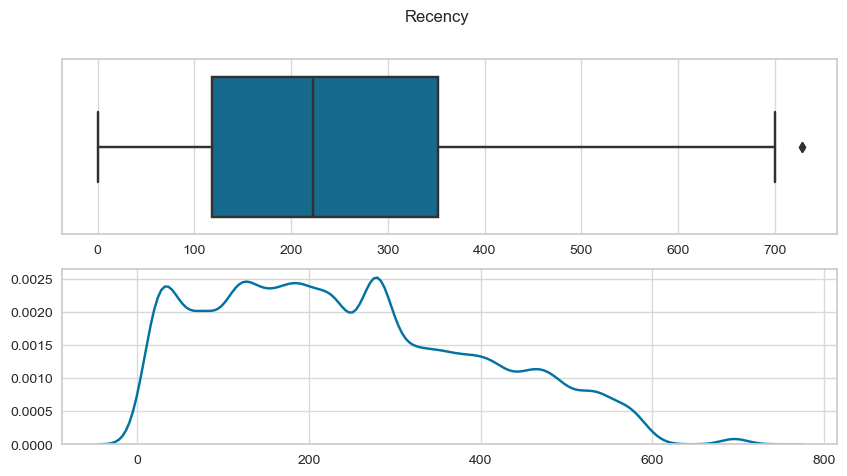

Frequency
----------
count   95419.0000
mean        1.0340
std         0.2112
min         1.0000
25%         1.0000
50%         1.0000
75%         1.0000
max        16.0000
Name: Frequency, dtype: float64


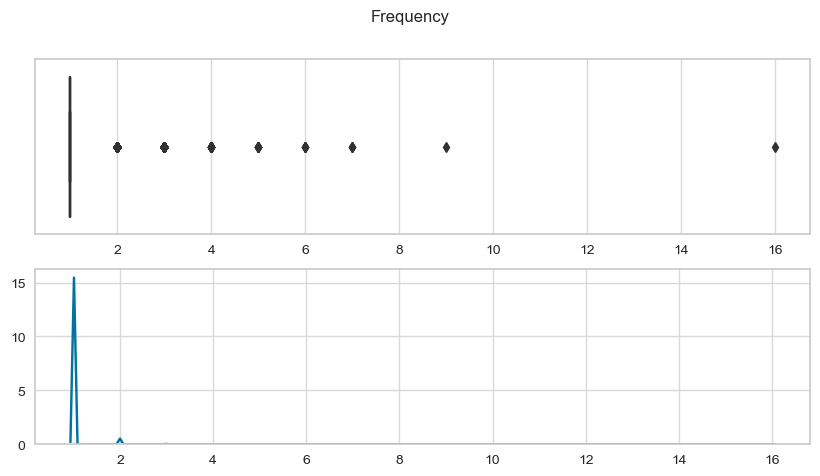

Monetary
----------
count   95419.0000
mean      166.0705
std       228.3419
min         9.5900
25%        63.1000
50%       107.9500
75%       183.2700
max     13664.0800
Name: Monetary, dtype: float64


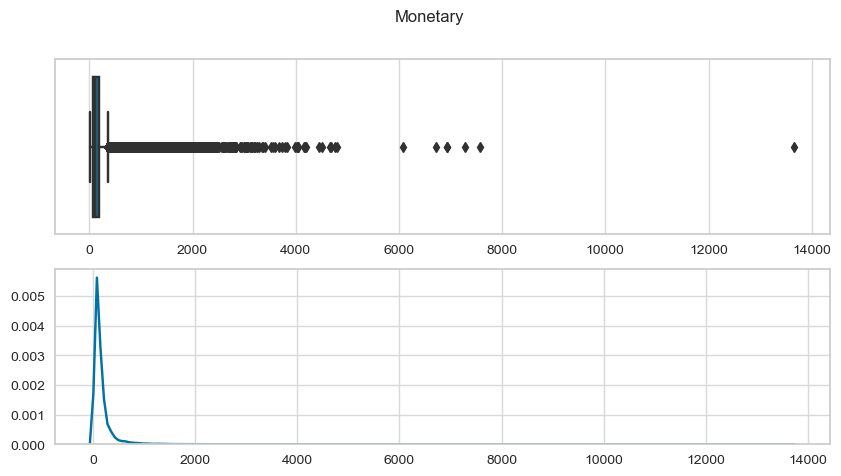

Satisfaction
----------
count   95419.0000
mean        4.1006
std         1.3218
min         1.0000
25%         4.0000
50%         5.0000
75%         5.0000
max         5.0000
Name: Satisfaction, dtype: float64


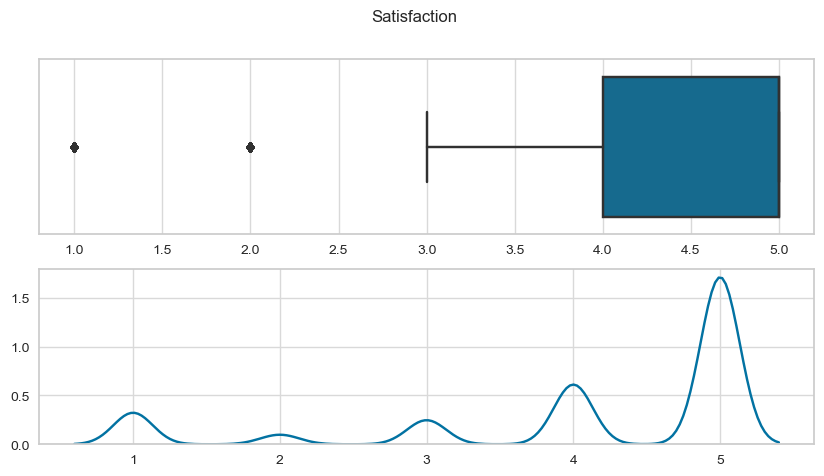

In [284]:
for feature in rfms_features:
    print(feature)
    print('----------')
    print(df_rfm[feature].describe())

    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 5))
    fig.suptitle(feature, fontsize=12)

    sns.boxplot(x=df_rfm[feature], ax=ax1)
    ax1.set(xlabel=None)

    sns.kdeplot(x=df_rfm[feature], ax=ax2)
    ax2.set(xlabel=None)
    ax2.set(ylabel=None)
    plt.show()

As we have 97% of customers with only 1 order, the distribution for Frequency and Monetary follow the ones that we observed in the exploratory analysis. It is also true for the Recency, the kde plot follows in the opposite direction the number of orders plot.

**Correlations**

Check if we have any correlations between RFM features.

In [269]:
correlations = df_rfm[rfms_features].corr()
correlations

,Recency,Frequency,Monetary,Satisfaction
Recency,1.0000,-0.0223,-0.0030,-0.0187
Frequency,-0.0223,1.0000,0.1222,0.0049
Monetary,-0.0030,0.1222,1.0000,-0.0455
Satisfaction,-0.0187,0.0049,-0.0455,1.0000


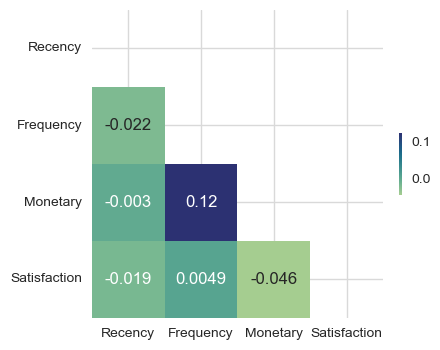

In [270]:
mask = np.zeros_like(correlations, dtype=bool)
mask[np.triu_indices_from(mask)] = True

plt.figure(figsize=(4, 4))
corr_heatmap = sns.heatmap(correlations,
                           cbar_kws={'fraction': 0.01},
                           mask=mask,
                           annot=True,
                           cmap="crest"
                           )
plt.xticks(rotation=0)
plt.yticks(rotation=0)
corr_heatmap.set(xlabel="", ylabel="")
plt.show()

As we can see from the correlation graph above, there are no significant correlations between the RFM features, we can only point out a very small relation between Monetary and Frequency which looks logical.

# Conclusion

<u>Here is a summary of what has been done in the first step of the project:</u>

- Import and analysis of the datasets
- Data cleaning
- Data aggregation
- Exploratory analysis
- Creation of the RFM dataset
- Quick analysis of the RFM dataset

<u>We can point out the following insights from the exploratory analysis:</u>

- 97% of customers have placed only 1 order
- November 2017 was the most profitable month
- Customers prefer 1-item orders instead of bulk orders.
- Customer satisfaction is pretty high (78%)


**Note:**
the given dataset does not allow us to properly understand the clients behaviour given that only 3% of customers have placed more than 1 order. It could have been interesting to calculate the average basket value if we had more clients with >1 order or the seasonality if we had data covering multiple years.

**Export the rfm_dataset for the clustering**

In [271]:
df_rfm.to_csv('data/cleaned/df_rfm.csv', index=False)